## 1.주제: UFC 데이터를 이용한 Favorite/Underdog의 승률 분석

### 들어가기 전
UFC에서는 두 선수의 시합이 결정되면 오즈 메이커(oddsmaker: 다양한 경기의 승산을 측정하는 프로)가 두 선수의 주된 무술 스타일의 상성, 현재 기세, 자세, 리치,등의 정보를 종합해 누가 더 우세한지를 결정한다. 이에 따라 도박사들은 자신이 어느 선수에 배팅을 할지 결정하게 된다. 승률이 높은 쪽을 'Favorite', 낮은 쪽을 'Underdog'이라 칭하고 경기장에서의 코너 색깔도 이에 따라 결정된다. 보통 'Favorite'에 속하는 선수들이 'Red'코너를 배정받고, 'Underdog'에 속하는 선수들이 'Blue'코너를 배정 받는다.

### 주제 선정 이유




## 2. 가설 혹은 명제

#### 가설1. Red코너가 Blue코너보다 승률이 더 높을 것이다.

#### 가설2. 공격의 정확성이 높을수록 승률이 높을 것이다.

#### 가설3. 헤비급은 한방 싸움이기 때문에 상대적으로 다른 체급에 비해 upset이 많이 일어날 것이다.
           (upset:'Underdog'이 'Favorite'을 이기는 경우)

#### 가설4. 평균적으로 25~30세 선수들의 승률이 그 외 연령대 선수들보다 승률이 좋을 것이다.

#### 가설5. 판정으로 인해 경기의 승/패가 갈리는 경우가 가장 많을 것이다.

## 3. 데이터 획득 및 가공

#### 1. 1993년부터 2021년까지의 UFC 경기 기록
https://www.kaggle.com/datasets/rajeevw/ufcdata
#### 2. 위 데이터에 대한 구체적인 설명
https://github.com/WarrierRajeev/UFC-Predictions
#### 3. UFC 공식 사이트
http://statleaders.ufc.com/

## 4. 데이터 분석

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 분석할 주된 데이터

In [124]:
df= pd.read_csv('./UFC.csv', encoding= 'cp949')
df


,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,Remco Pardoel,Alberta Cerra Leon,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,...,0,0,0,0,Southpaw,190.50,NaN,260.0,NaN,NaN
6008,Orlando Wiet,Robert Lucarelli,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,...,0,0,0,0,Southpaw,177.80,NaN,170.0,NaN,NaN
6009,Johnny Rhodes,David Levicki,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,...,0,0,0,0,Orthodox,182.88,NaN,210.0,NaN,NaN
6010,Patrick Smith,Ray Wizard,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,...,0,0,0,0,Orthodox,187.96,NaN,225.0,NaN,30.0


In [125]:
df.columns

Index(['R_fighter', 'B_fighter', 'Referee', 'date', 'location', 'Winner',
       'title_bout', 'weight_class', 'B_avg_KD', 'B_avg_opp_KD',
       ...
       'R_win_by_Decision_Unanimous', 'R_win_by_KO/TKO', 'R_win_by_Submission',
       'R_win_by_TKO_Doctor_Stoppage', 'R_Stance', 'R_Height_cms',
       'R_Reach_cms', 'R_Weight_lbs', 'B_age', 'R_age'],
      dtype='object', length=144)

In [126]:
df.describe()

,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,...,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
count,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.00000,4585.000000,...,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6008.000000,5606.000000,6010.000000,5840.000000,5949.000000
mean,0.247476,0.176818,0.453310,0.434290,0.292650,0.268742,0.478884,0.409276,0.15673,0.141306,...,0.306886,1.251331,1.297572,0.796241,0.069195,178.991788,183.562347,170.686356,29.293151,29.598252
std,0.378509,0.324633,0.130458,0.132618,0.273628,0.267178,0.724229,0.653826,0.34199,0.322623,...,0.619485,1.681376,1.859955,1.355801,0.273980,8.812985,10.585313,35.724626,4.063297,4.167755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,152.400000,152.400000,115.000000,18.000000,19.000000
25%,0.000000,0.000000,0.376489,0.351045,0.031250,0.033203,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,172.720000,177.800000,145.000000,26.000000,27.000000
50%,0.015625,0.000000,0.450000,0.427500,0.250000,0.200000,0.148468,0.098389,0.00000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,180.340000,182.880000,170.000000,29.000000,29.000000
75%,0.500000,0.250000,0.527500,0.510000,0.500000,0.422812,0.750000,0.531250,0.12500,0.125000,...,0.000000,2.000000,2.000000,1.000000,0.000000,185.420000,190.500000,185.000000,32.000000,32.000000
max,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,8.000000,7.000000,4.00000,3.000000,...,5.000000,10.000000,11.000000,13.000000,2.000000,210.820000,213.360000,345.000000,51.000000,47.000000


In [127]:
from datetime import datetime


In [128]:
df['date'] = pd.to_datetime(df['date'])
df['date']=df['date'].apply(lambda x: x.year)
df

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,Remco Pardoel,Alberta Cerra Leon,John McCarthy,1994,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,...,0,0,0,0,Southpaw,190.50,NaN,260.0,NaN,NaN
6008,Orlando Wiet,Robert Lucarelli,John McCarthy,1994,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,...,0,0,0,0,Southpaw,177.80,NaN,170.0,NaN,NaN
6009,Johnny Rhodes,David Levicki,John McCarthy,1994,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,...,0,0,0,0,Orthodox,182.88,NaN,210.0,NaN,NaN
6010,Patrick Smith,Ray Wizard,John McCarthy,1994,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,...,0,0,0,0,Orthodox,187.96,NaN,225.0,NaN,30.0


In [129]:
df.drop(df[df['date']<2011].index, inplace=True)
df

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500000,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125000,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4510,Clay Guida,Takanori Gomi,Josh Rosenthal,2011,"Las Vegas, Nevada, USA",Red,False,Lightweight,0.500000,0.0,...,1,1,3,0,Orthodox,170.18,177.80,155.0,32.0,29.0
4511,Frankie Edgar,Gray Maynard,Yves Lavigne,2011,"Las Vegas, Nevada, USA",Draw,True,Lightweight,0.011719,0.0,...,6,1,1,0,Orthodox,167.64,172.72,135.0,31.0,29.0
4512,Mike Brown,Diego Nunes,Yves Lavigne,2011,"Las Vegas, Nevada, USA",Blue,False,Featherweight,NaN,NaN,...,0,0,0,0,Orthodox,167.64,177.80,145.0,28.0,35.0
4513,Daniel Roberts,Greg Soto,Kim Winslow,2011,"Las Vegas, Nevada, USA",Red,False,Welterweight,0.000000,0.0,...,0,0,1,0,Southpaw,177.80,187.96,170.0,24.0,30.0


In [130]:
used_columns = ['R_fighter', 'B_fighter', 'date', 'Winner', 'weight_class']
ufc_df = df[used_columns]
ufc_df
ufc_df.describe()

,date
count,4515.000000
mean,2015.968106
std,2.828091
min,2011.000000
25%,2014.000000
50%,2016.000000
75%,2018.000000
max,2021.000000


## 가설1

In [131]:
ufc_df1= df
ufc_df1['Winner'].value_counts()

Red     2597
Blue    1826
Draw      92
Name: Winner, dtype: int64

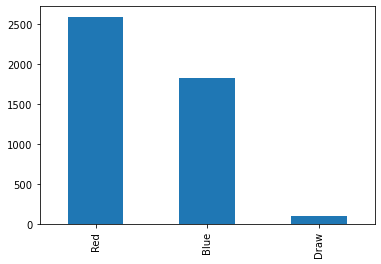

In [132]:
ufc_df1.Winner.value_counts().plot.bar()

In [133]:
import seaborn as sns

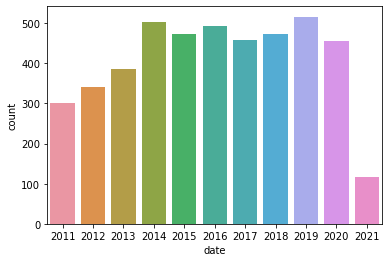

In [134]:
sns.countplot(x='date',data=ufc_df1)

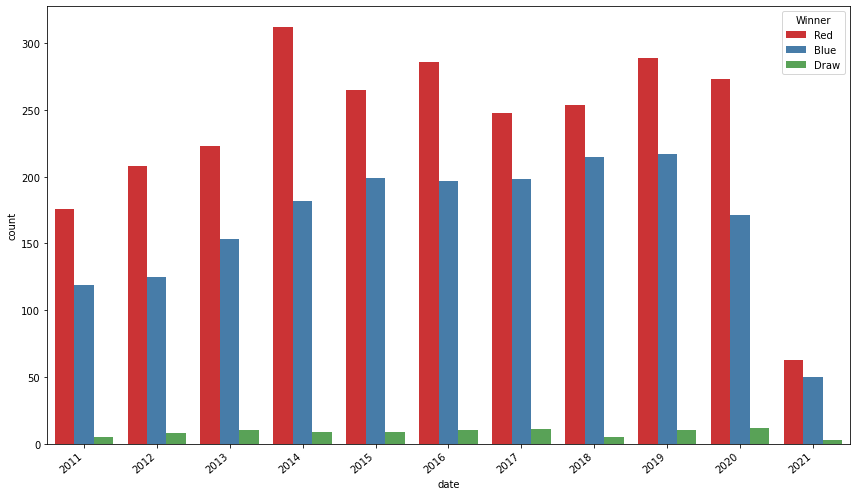

In [135]:
ax = plt.subplots(figsize=(12,7))
ax = sns.countplot(x='date',hue='Winner',palette='Set1', data=ufc_df1)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.tight_layout()
plt.show()

## 가설2

In [136]:
all_columns = df.columns.to_list()
all_columns

['R_fighter',
 'B_fighter',
 'Referee',
 'date',
 'location',
 'Winner',
 'title_bout',
 'weight_class',
 'B_avg_KD',
 'B_avg_opp_KD',
 'B_avg_SIG_STR_pct',
 'B_avg_opp_SIG_STR_pct',
 'B_avg_TD_pct',
 'B_avg_opp_TD_pct',
 'B_avg_SUB_ATT',
 'B_avg_opp_SUB_ATT',
 'B_avg_REV',
 'B_avg_opp_REV',
 'B_avg_SIG_STR_att',
 'B_avg_SIG_STR_landed',
 'B_avg_opp_SIG_STR_att',
 'B_avg_opp_SIG_STR_landed',
 'B_avg_TOTAL_STR_att',
 'B_avg_TOTAL_STR_landed',
 'B_avg_opp_TOTAL_STR_att',
 'B_avg_opp_TOTAL_STR_landed',
 'B_avg_TD_att',
 'B_avg_TD_landed',
 'B_avg_opp_TD_att',
 'B_avg_opp_TD_landed',
 'B_avg_HEAD_att',
 'B_avg_HEAD_landed',
 'B_avg_opp_HEAD_att',
 'B_avg_opp_HEAD_landed',
 'B_avg_BODY_att',
 'B_avg_BODY_landed',
 'B_avg_opp_BODY_att',
 'B_avg_opp_BODY_landed',
 'B_avg_LEG_att',
 'B_avg_LEG_landed',
 'B_avg_opp_LEG_att',
 'B_avg_opp_LEG_landed',
 'B_avg_DISTANCE_att',
 'B_avg_DISTANCE_landed',
 'B_avg_opp_DISTANCE_att',
 'B_avg_opp_DISTANCE_landed',
 'B_avg_CLINCH_att',
 'B_avg_CLINCH_lande

In [137]:
B_columns = []
R_columns = []
parts = ['HEAD','BODY','LEG']
for col in all_columns:
    if col.startswith('B_'):
        if col=='B_fighter':
            B_columns.append(col)
        elif 'opp' in col:
            continue
        elif any(part in col for part in parts):
            B_columns.append(col)

    elif col.startswith('R_'):
        if col=='R_fighter':
            R_columns.append(col)
        elif 'opp' in col:
            continue
        elif any(part in col for part in parts):
            R_columns.append(col)

In [138]:
print(B_columns)
print(R_columns)

['B_fighter', 'B_avg_HEAD_att', 'B_avg_HEAD_landed', 'B_avg_BODY_att', 'B_avg_BODY_landed', 'B_avg_LEG_att', 'B_avg_LEG_landed']
['R_fighter', 'R_avg_HEAD_att', 'R_avg_HEAD_landed', 'R_avg_BODY_att', 'R_avg_BODY_landed', 'R_avg_LEG_att', 'R_avg_LEG_landed']


In [139]:
R_df = df.loc[df['Winner']=='Red',R_columns]
R_df

,R_fighter,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed
0,Adrian Yanez,32.000000,15.000000,2.000000,2.000000,0.000000,0.000000
1,Trevin Giles,71.093750,38.062500,4.687500,3.312500,1.781250,1.781250
2,Tai Tuivasa,42.500000,16.781250,5.781250,4.546875,10.953125,9.046875
7,Derek Brunson,98.620758,46.651840,22.163742,15.460419,12.689011,10.067642
8,Montel Jackson,55.437500,31.812500,9.000000,8.312500,3.562500,2.875000
...,...,...,...,...,...,...,...
4505,Jeremy Stephens,76.380859,23.375000,15.589844,11.660156,26.789062,15.873047
4508,Dustin Poirier,NaN,NaN,NaN,NaN,NaN,NaN
4510,Clay Guida,62.888672,10.443359,4.044434,2.759277,6.720703,5.857422
4513,Daniel Roberts,18.750000,3.250000,0.500000,0.250000,1.000000,0.500000


In [140]:
R_df.dropna(inplace=True)
R_df.reset_index(drop=True, inplace=True)

In [141]:
R_df['R_avg_HEAD_acc'] = R_df['R_avg_HEAD_landed']/R_df['R_avg_HEAD_att']
R_df['R_avg_BODY_acc'] = R_df['R_avg_BODY_landed']/R_df['R_avg_BODY_att']
R_df['R_avg_LEG_acc'] = R_df['R_avg_LEG_landed']/R_df['R_avg_LEG_att']

In [142]:
R_df.fillna(0)

,R_fighter,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_HEAD_acc,R_avg_BODY_acc,R_avg_LEG_acc
0,Adrian Yanez,32.000000,15.000000,2.000000,2.000000,0.000000,0.000000,0.468750,1.000000,0.000000
1,Trevin Giles,71.093750,38.062500,4.687500,3.312500,1.781250,1.781250,0.535385,0.706667,1.000000
2,Tai Tuivasa,42.500000,16.781250,5.781250,4.546875,10.953125,9.046875,0.394853,0.786486,0.825963
3,Derek Brunson,98.620758,46.651840,22.163742,15.460419,12.689011,10.067642,0.473043,0.697555,0.793414
4,Montel Jackson,55.437500,31.812500,9.000000,8.312500,3.562500,2.875000,0.573844,0.923611,0.807018
...,...,...,...,...,...,...,...,...,...,...
2349,Charlie Brenneman,30.500000,10.000000,10.500000,10.000000,2.000000,1.000000,0.327869,0.952381,0.500000
2350,Jeremy Stephens,76.380859,23.375000,15.589844,11.660156,26.789062,15.873047,0.306032,0.747933,0.592520
2351,Clay Guida,62.888672,10.443359,4.044434,2.759277,6.720703,5.857422,0.166061,0.682241,0.871549
2352,Daniel Roberts,18.750000,3.250000,0.500000,0.250000,1.000000,0.500000,0.173333,0.500000,0.500000


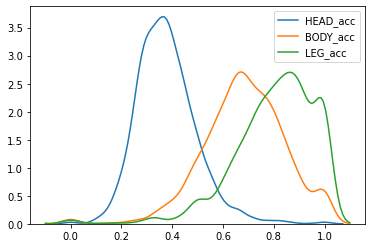

In [143]:
fig, ax = plt.subplots()

ax = sns.kdeplot(data=R_df['R_avg_HEAD_acc'], label='HEAD_acc', ax=ax)
ax = sns.kdeplot(data=R_df['R_avg_BODY_acc'], label='BODY_acc', ax=ax)
ax = sns.kdeplot(data=R_df['R_avg_LEG_acc'], label='LEG_acc', ax=ax)

In [144]:
B_df = df.loc[df['Winner']=='Blue',B_columns]
B_df

,B_fighter,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed
3,Montserrat Conejo,NaN,NaN,NaN,NaN,NaN,NaN
4,Macy Chiasson,77.375000,31.375000,31.187500,26.187500,0.625000,0.375000
5,Grant Dawson,60.625000,23.125000,10.000000,4.500000,15.375000,13.125000
6,Max Griffin,102.328125,38.814453,20.951172,14.419922,7.539062,6.878906
10,Matheus Nicolau,45.625000,18.250000,20.375000,13.000000,5.250000,4.875000
...,...,...,...,...,...,...,...
4502,Chris Cariaso,NaN,NaN,NaN,NaN,NaN,NaN
4504,Brad Tavares,29.000000,13.000000,4.000000,4.000000,1.000000,1.000000
4507,Brian Stann,46.687500,16.125000,10.687500,9.000000,6.000000,5.375000
4509,Dong Hyun Kim,41.500000,25.187500,1.375000,1.375000,3.750000,3.625000


In [145]:
B_df.dropna(inplace=True)
B_df.reset_index(drop=True, inplace=True)

In [146]:
B_df['B_avg_HEAD_acc'] = B_df['B_avg_HEAD_landed']/B_df['B_avg_HEAD_att']
B_df['B_avg_BODY_acc'] = B_df['B_avg_BODY_landed']/B_df['B_avg_BODY_att']
B_df['B_avg_LEG_acc'] = B_df['B_avg_LEG_landed']/B_df['B_avg_LEG_att']

In [147]:
B_df.fillna(0)

,B_fighter,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_HEAD_acc,B_avg_BODY_acc,B_avg_LEG_acc
0,Macy Chiasson,77.375000,31.375000,31.187500,26.187500,0.625000,0.375000,0.405493,0.839679,0.600000
1,Grant Dawson,60.625000,23.125000,10.000000,4.500000,15.375000,13.125000,0.381443,0.450000,0.853659
2,Max Griffin,102.328125,38.814453,20.951172,14.419922,7.539062,6.878906,0.379314,0.688263,0.912435
3,Matheus Nicolau,45.625000,18.250000,20.375000,13.000000,5.250000,4.875000,0.400000,0.638037,0.928571
4,Ryan Spann,44.875000,18.562500,4.312500,3.437500,0.125000,0.062500,0.413649,0.797101,0.500000
...,...,...,...,...,...,...,...,...,...,...
1453,Matt Wiman,44.628906,15.781250,5.097656,3.214844,7.523438,4.992188,0.353611,0.630651,0.663551
1454,Yves Edwards,77.241211,26.831055,7.839844,6.397461,3.957031,3.339844,0.347367,0.816019,0.844028
1455,Brad Tavares,29.000000,13.000000,4.000000,4.000000,1.000000,1.000000,0.448276,1.000000,1.000000
1456,Brian Stann,46.687500,16.125000,10.687500,9.000000,6.000000,5.375000,0.345382,0.842105,0.895833


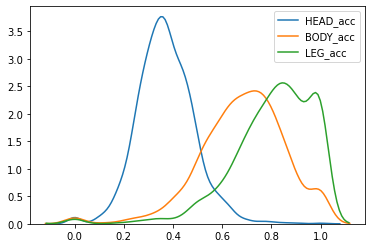

In [148]:
fig, ax = plt.subplots()

ax = sns.kdeplot(data=B_df['B_avg_HEAD_acc'], label='HEAD_acc', ax=ax)
ax = sns.kdeplot(data=B_df['B_avg_BODY_acc'], label='BODY_acc', ax=ax)
ax = sns.kdeplot(data=B_df['B_avg_LEG_acc'], label='LEG_acc', ax=ax)

## 가설3

In [149]:
Blue_df = df[df['Winner']=='Blue']
Blue_df

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125000,0.000,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0
5,Leonardo Santos,Grant Dawson,Chris Tognoni,2021,"Las Vegas, Nevada, USA",Blue,False,Lightweight,0.000000,0.000,...,2,2,2,0,Orthodox,182.88,190.50,155.0,27.0,41.0
6,Song Kenan,Max Griffin,Keith Peterson,2021,"Las Vegas, Nevada, USA",Blue,False,Welterweight,0.046875,0.125,...,1,3,0,0,Orthodox,182.88,180.34,170.0,35.0,31.0
10,Manel Kape,Matheus Nicolau,NaN,2021,"Las Vegas, Nevada, USA",Blue,False,Flyweight,1.000000,0.625,...,0,0,0,0,Southpaw,165.10,172.72,125.0,28.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4502,Will Campuzano,Chris Cariaso,Don Turnage,2011,"Killeen, Texas, USA",Blue,False,Bantamweight,NaN,NaN,...,0,0,0,0,Orthodox,175.26,177.80,125.0,29.0,24.0
4504,Phil Baroni,Brad Tavares,Josh Rosenthal,2011,"Las Vegas, Nevada, USA",Blue,False,Middleweight,0.000000,0.000,...,1,2,0,0,Orthodox,175.26,182.88,170.0,23.0,34.0
4507,Chris Leben,Brian Stann,Josh Rosenthal,2011,"Las Vegas, Nevada, USA",Blue,False,Middleweight,0.000000,0.000,...,2,6,2,0,Southpaw,180.34,185.42,185.0,30.0,30.0
4509,Nate Diaz,Dong Hyun Kim,Yves Lavigne,2011,"Las Vegas, Nevada, USA",Blue,False,Welterweight,0.000000,0.000,...,0,1,6,0,Southpaw,182.88,193.04,170.0,29.0,25.0


In [150]:
df_plot = df.groupby(['weight_class', 'Winner']).size().reset_index().pivot(index='weight_class', columns='Winner', values=0)

In [151]:
df_plot['sum'] = df_plot.sum(axis=1)
df_plot = df_plot.loc[:,'Blue':'Red'].div(df_plot['sum'],axis=0)
df_plot

Winner,Blue,Draw,Red
weight_class,,,
Bantamweight,0.390295,0.027426,0.582278
CatchWeight,0.424242,0.030303,0.545455
Featherweight,0.381387,0.021898,0.596715
Flyweight,0.395652,0.017391,0.586957
Heavyweight,0.409884,0.020349,0.569767
LightHeavyweight,0.389972,0.033426,0.576602
Lightweight,0.410486,0.017903,0.571611
Middleweight,0.425287,0.017241,0.557471
Welterweight,0.421543,0.018617,0.559840


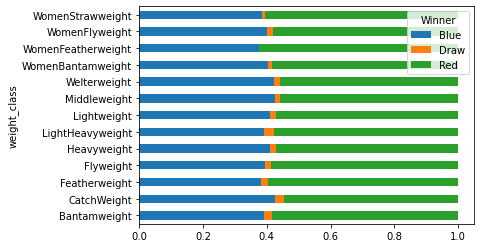

In [152]:
df_plot.plot(kind='barh',stacked=True)

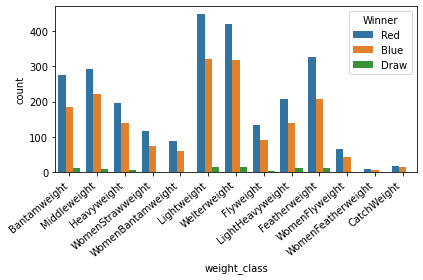

In [153]:
ax=sns.countplot(data=df, x='weight_class', hue='Winner')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.tight_layout()
plt.show()

## 가설 4

In [160]:
R_winner_df = df.loc[df['Winner']=='Red',['R_fighter','R_age']]
B_winner_df = df.loc[df['Winner']=='Blue',['B_fighter','B_age']]

In [161]:
R_winner_df

,R_fighter,R_age
0,Adrian Yanez,27.0
1,Trevin Giles,28.0
2,Tai Tuivasa,28.0
7,Derek Brunson,37.0
8,Montel Jackson,28.0
...,...,...
4505,Jeremy Stephens,24.0
4508,Dustin Poirier,21.0
4510,Clay Guida,29.0
4513,Daniel Roberts,30.0


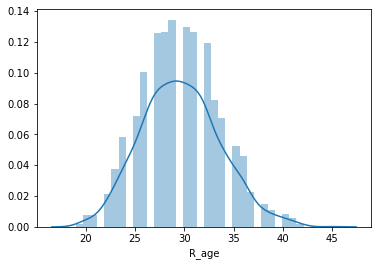

In [165]:
sns.distplot(R_winner_df['R_age'])

In [162]:
B_winner_df

,B_fighter,B_age
3,Montserrat Conejo,28.0
4,Macy Chiasson,29.0
5,Grant Dawson,27.0
6,Max Griffin,35.0
10,Matheus Nicolau,28.0
...,...,...
4502,Chris Cariaso,29.0
4504,Brad Tavares,23.0
4507,Brian Stann,30.0
4509,Dong Hyun Kim,29.0


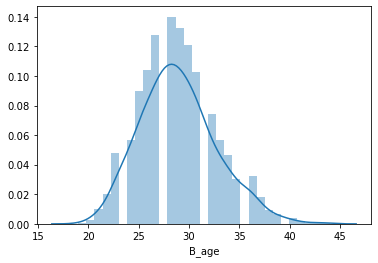

In [166]:
sns.distplot(B_winner_df['B_age'])